# DTOcean Plot Examples

In [1]:
%matplotlib inline

In [2]:
from IPython.display import display, HTML

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14.0, 8.0)

In [4]:
import numpy as np
from shapely.geometry import Polygon, Point
from descartes import PolygonPatch

In [5]:
import sys
sys.path.append('../')

In [6]:
from aneris.control.factory import InterfaceFactory

In [7]:
from dtocean_core import start_logging
from dtocean_core.core import Core, AutoPlot
from dtocean_core.menu import DataMenu, ModuleMenu, ProjectMenu
from dtocean_core.pipeline import Tree
from dtocean_core.data import CoreMetaData

In [8]:
def html_list(x):
    message = "<ul>"
    for name in x:
        message += "<li>{}</li>".format(name)
    message += "</ul>"
    return message
def html_dict(x):
    message = "<ul>"
    for name, status in x.iteritems():
        message += "<li>{}: <b>{}</b></li>".format(name, status)
    message += "</ul>"
    return message

In [9]:
# Bring up the logger
start_logging()

2016-09-01 09:31:10,940 - INFO - dtocean_core - Begin logging for dtocean_core.


## Create the core, menus and pipeline tree

In [10]:
new_core = Core()
data_menu = DataMenu()
project_menu = ProjectMenu()
module_menu = ModuleMenu()
pipe_tree = Tree()

## Create a new project

In [11]:
project_title = "DTOcean"  
new_project = project_menu.new_project(new_core, project_title)

2016-09-01 09:31:16,056 - INFO - aneris.entity.simulation - Created new Simulation with title "Default"
2016-09-01 09:31:16,056 - INFO - aneris.control.simulation - Datastate with level "initial" stored
2016-09-01 09:31:16,056 - INFO - aneris.control.pipeline - New Hub created for interface ProjectInterface.


## Set the device type

In [12]:
options_branch = pipe_tree.get_branch(new_core, new_project, "System Type Selection")
variable_id = "device.system_type"
my_var = options_branch.get_input_variable(new_core, new_project, variable_id)
my_var.set_raw_interface(new_core, "Tidal Fixed")
my_var.read(new_core, new_project)

2016-09-01 09:31:16,088 - INFO - aneris.control.data - New "device.system_type" data stored with index 0M5T5P
2016-09-01 09:31:16,088 - INFO - aneris.control.simulation - Datastate stored


## Initiate the pipeline

In [13]:
project_menu.initiate_pipeline(new_core, new_project)

2016-09-01 09:31:16,151 - INFO - aneris.control.simulation - Datastate with level "system type selection start" stored
2016-09-01 09:31:16,151 - INFO - aneris.control.data - New "hidden.pipeline_active" data stored with index X5BDAN
2016-09-01 09:31:16,151 - INFO - aneris.control.simulation - Datastate with level "system type selection output" stored
2016-09-01 09:31:16,151 - INFO - aneris.control.pipeline - New Pipeline created for interface ModuleInterface.
2016-09-01 09:31:16,165 - INFO - aneris.control.pipeline - New Hub created for interface ThemeInterface.


## Discover available modules

In [14]:
names = module_menu.get_available(new_core, new_project)
message = html_list(names)
HTML(message)

## Activate a module

In [15]:
module_name = 'Hydrodynamics'
module_menu.activate(new_core, new_project, module_name)
hydro_branch = pipe_tree.get_branch(new_core, new_project, 'Hydrodynamics')

## Initiate the dataflow

In [16]:
project_menu.initiate_dataflow(new_core, new_project)

2016-09-01 09:31:16,213 - INFO - aneris.control.data - New "hidden.dataflow_active" data stored with index JGJ231
2016-09-01 09:31:16,213 - INFO - aneris.control.simulation - Datastate stored
2016-09-01 09:31:16,213 - INFO - aneris.control.simulation - Datastate with level "modules initial" stored


## Move the system to the post-filter state and ready the system

In [17]:
new_core.inspect_level(new_project, "modules initial")
new_core.reset_level(new_project, preserve_level=True)

## Load test data

In [18]:
%run inputs_plots.py

generate test data: D:\Usuarios\108630\Programming\Python\notebooks\inputs_plots.pkl


In [19]:
hydro_branch.read_test_data(new_core,
                            new_project,
                            "inputs_plots.pkl")

2016-09-01 09:31:17,148 - INFO - aneris.control.data - New "device.cut_in_velocity" data stored with index 0S18QA
2016-09-01 09:31:17,148 - INFO - aneris.control.data - New "device.bidirection" data stored with index B78NSO
2016-09-01 09:31:17,164 - INFO - aneris.control.data - New "farm.tidal_series" data stored with index NEDDDV
2016-09-01 09:31:17,164 - INFO - aneris.control.data - New "device.installation_depth_max" data stored with index 17WQTW
2016-09-01 09:31:17,164 - INFO - aneris.control.data - New "options.user_array_option" data stored with index KDCEQG
2016-09-01 09:31:17,164 - INFO - aneris.control.data - New "device.coordinate_system" data stored with index 6LAW8Z
2016-09-01 09:31:17,164 - INFO - aneris.control.data - New "device.turbine_diameter" data stored with index VI1VE3
2016-09-01 09:31:17,164 - INFO - aneris.control.data - New "device.minimum_distance_x" data stored with index 7OUDNC
2016-09-01 09:31:17,164 - INFO - aneris.control.data - New "device.minimum_distan

## Check if the module can be executed

In [20]:
can_execute = module_menu.is_executable(new_core, new_project, module_name)
display(can_execute)

True

## Execute the current module

In [21]:
module_menu.execute_current(new_core, new_project)

2016-09-01 09:31:17,226 - INFO - aneris.control.simulation - Datastate with level "hydrodynamics start" stored
No NOGO areas related to the machine depthinstallation constraints have been found.
2016-09-01 09:31:17,789 - INFO - dtocean_hydro.input - --> MACHINE INPUT SUMMARY:

{   'Clen': (8.0, 20.0),
    'Floatflag': False,
    'InstalDepth': (-inf, 0.0),
    'MaxNumDevices': 5,
    'MinDist': (40.0, 40.0),
    'OptThreshold': 0,
    'RatedPowerArray': 5.0,
    'RatedPowerDevice': 1.0,
    'Type': 'Tidal',
    'UserArray': {   'Option': 2,
                     'Value': array([[ 450.,  100.],
       [ 550.,  100.],
       [ 450.,  150.],
       [ 550.,  150.]])},
    'UserOutputTable': None,
    'YawAngle': 0.0,
    'lCS': array([  0.,   0.,  20.]),
    'tidalFlag': True,
    'tidal_bidirectional': False,
    'tidal_cutinout': (1.0, 4.0),
    'tidal_data_folder': None,
    'tidal_power_curve': array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  

## Autoplot Examples

### LineTable

In [22]:
new_var = hydro_branch.get_input_variable(new_core,
                                          new_project,
                                          'device.turbine_performance')

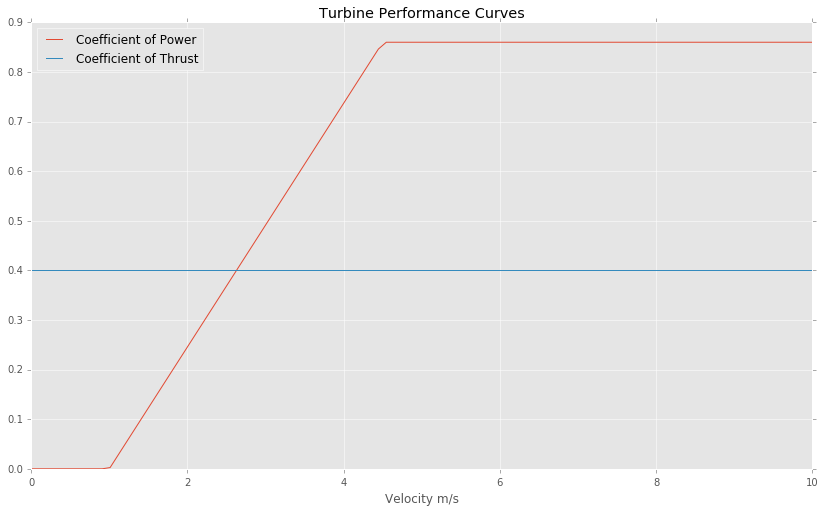

In [23]:
new_var.plot(new_core, new_project)

## Specific Plot Examples

### Tidal Power Performance

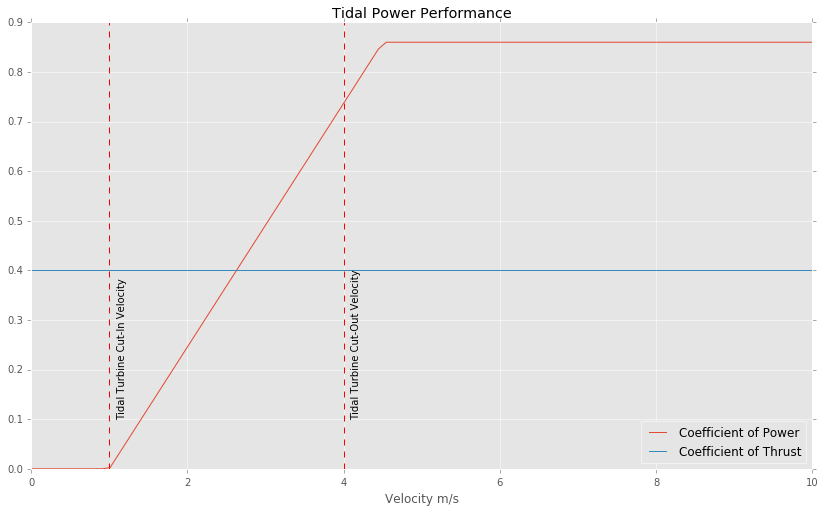

In [24]:
new_var.plot(new_core, new_project, 'Tidal Power Performance')

## PointData

In [25]:
test_PointData = hydro_branch.get_input_variable(new_core,
                                                 new_project,
                                                 'farm.tidal_occurrence_point')

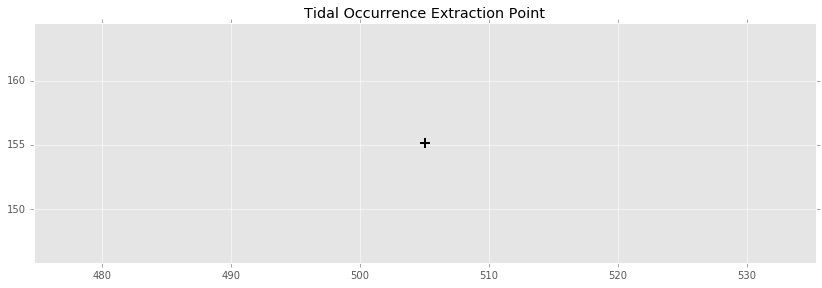

In [26]:
test_PointData.plot(new_core,new_project)

## PointList

In [27]:
test_PointList = hydro_branch.get_input_variable(new_core,
                                                 new_project,
                                                 'options.user_array_layout')

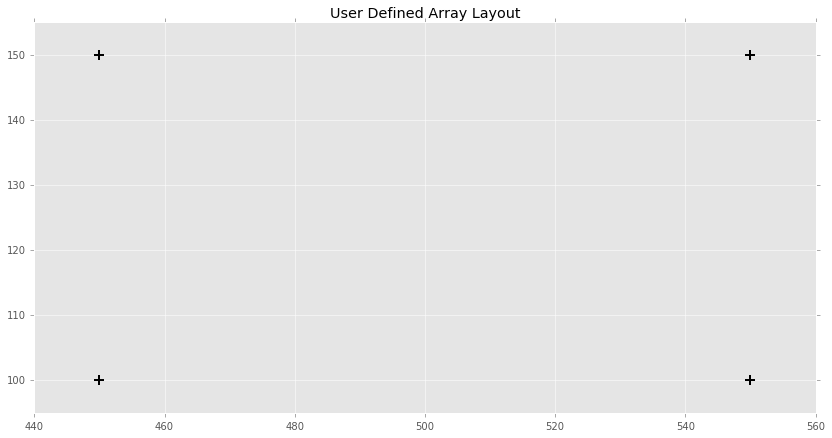

In [28]:
test_PointList.plot(new_core,new_project)

## PointDict

In [29]:
test_PointDict = hydro_branch.get_output_variable(new_core,
                                                  new_project,
                                                  'farm.layout')

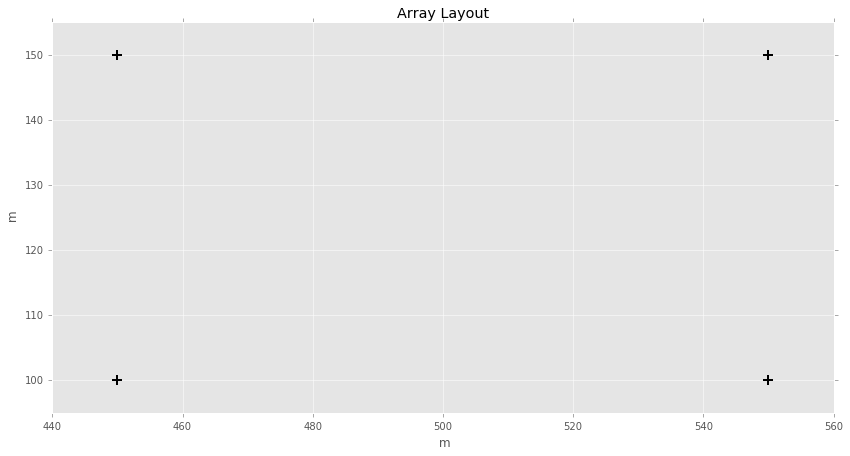

In [30]:
test_PointDict.plot(new_core,new_project)

## XGrid2D

In [31]:
test_XGrid2D = hydro_branch.get_input_variable(new_core,
                                               new_project,
                                               'farm.mannings')

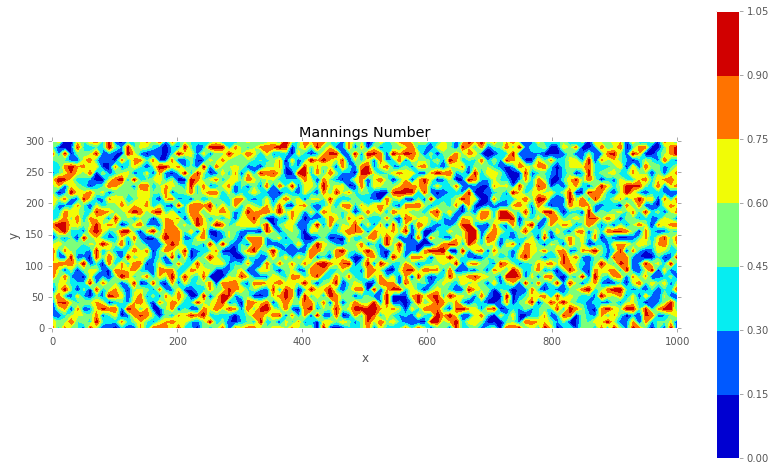

In [32]:
test_XGrid2D.plot(new_core,new_project)

## PolygonList

In [33]:
test_PolygonList = hydro_branch.get_input_variable(new_core,
                                                   new_project,
                                                   'farm.nogo_areas')

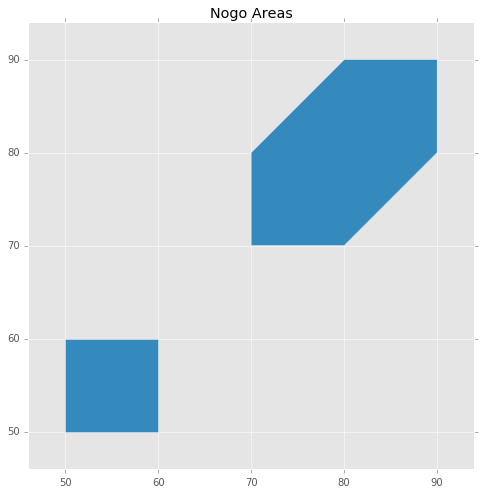

In [34]:
test_PolygonList.plot(new_core,new_project)

## NumpyLineDict

In [35]:
test_NumpyLineDict = hydro_branch.get_output_variable(new_core,
                                                 new_project,
                                                 'farm.mean_power_pmf_per_device')

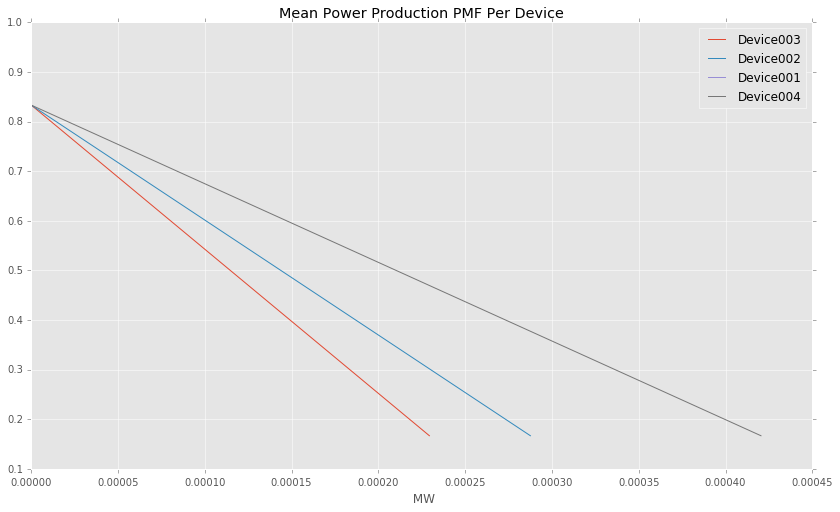

In [36]:
test_NumpyLineDict.plot(new_core,new_project)

## HistogramDict

In [37]:
test_HistogramDict = hydro_branch.get_output_variable(new_core,
                                                     new_project,
                                                     'farm.mean_power_hist_per_device')

In [38]:
test = test_HistogramDict.get_value(new_core, new_project)

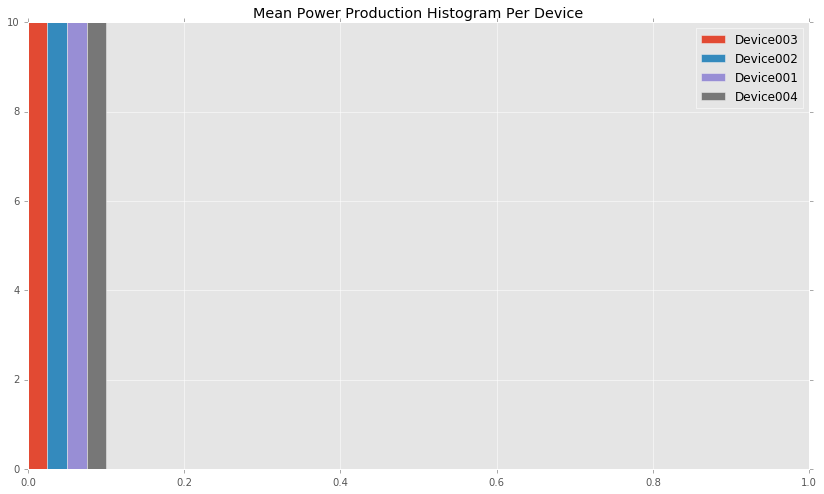

In [39]:
test_HistogramDict.plot(new_core, new_project)

## TimeTable

Fake an AutoPlot interface for this. First build the raw inputs and the necessary metadata (see tests/test_structures.py)

In [45]:
dates = []
dt = datetime(2010, 12, 01)
end = datetime(2010, 12, 02, 23, 59, 59)
step = timedelta(seconds=3600)

while dt < end:
    dates.append(dt)
    dt += step

a_values = np.random.rand(len(dates))
b_values = np.random.rand(len(dates))
raw = {"DateTime": dates,
       "a": a_values,
       "b": b_values}

meta = CoreMetaData({"identifier": "test",
                     "structure": "test",
                     "title": "test",
                     "labels": ["a", "b"],
                     "units": ["kg", None]})

Create the Structure object and get the processed data format

In [46]:
data_obj = new_core.control.get_structure("TimeTable")
data_value = data_obj.get_data(raw, meta)

Build the fake AutoPlot interface

In [47]:
interface_factory = InterfaceFactory(AutoPlot)
AutoCls = interface_factory(meta, data_obj)
test = AutoCls()

Add the data to the inteface and then call the AutoPlot connect method

In [48]:
test.put_data("test", data_value)
test.data.result

,a,b
DateTime,,
2010-12-01 00:00:00,0.103641,0.676150
2010-12-01 01:00:00,0.404433,0.392039
2010-12-01 02:00:00,0.437873,0.804481
2010-12-01 03:00:00,0.346290,0.460370
2010-12-01 04:00:00,0.071059,0.929857
2010-12-01 05:00:00,0.501972,0.528434
2010-12-01 06:00:00,0.384055,0.664620
2010-12-01 07:00:00,0.474715,0.368472
2010-12-01 08:00:00,0.429496,0.685824


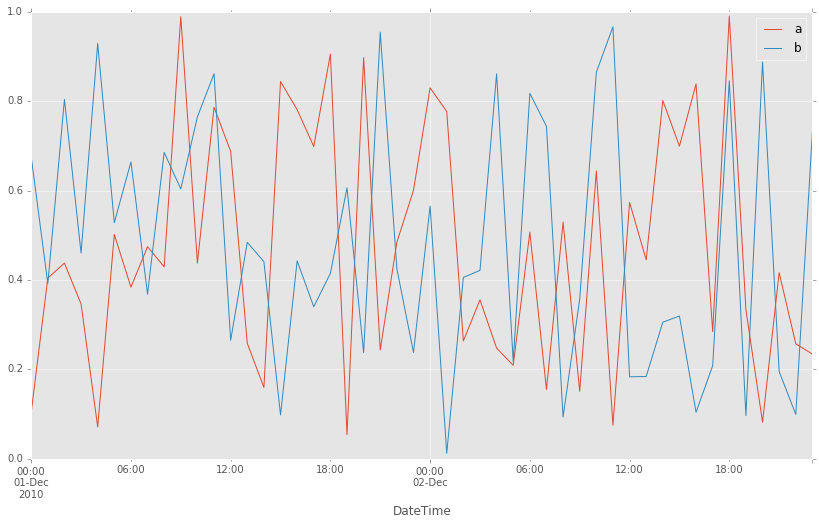

In [49]:
test.connect()